In [1]:
# import the needed libraries
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# config
img_width, img_height = 28,28 #width & height of input image
input_depth = 1 #1: gray image
train_data_dir = 'C:/Users/Mukesh/OneDrive/Desktop/dataset/train' #data training path
testing_data_dir = 'C:/Users/Mukesh/OneDrive/Desktop/dataset/test' #data testing path
epochs = 100 #number of training epoch
batch_size = 32 #training batch size

In [3]:
# define image generator for Keras,
# here, we map pixel intensity to 0-1
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [4]:
# read image batch by batch
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',#inpput iameg: gray
    target_size=(img_width,img_height),#input image size
    batch_size=batch_size,#batch size
    class_mode='categorical')#categorical: one-hot encoding format class label
testing_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1801 images belonging to 10 classes.
Found 52 images belonging to 10 classes.


In [5]:
# define number of filters and nodes in the fully connected layer
NUMB_FILTER_L1 = 20
NUMB_FILTER_L2 = 20
NUMB_FILTER_L3 = 20
NUMB_NODE_FC_LAYER = 10

In [6]:
#define input image order shape
if K.image_data_format() == 'channels_first':
    input_shape_val = (input_depth, img_width, img_height)
else:
    input_shape_val = (img_width, img_height, input_depth)

#define the network
model = Sequential()

# Layer 1
model.add(Conv2D(NUMB_FILTER_L1, (5, 5), 
                 input_shape=input_shape_val, 
                 padding='same', name='input_tensor'))
model.add(Activation('relu'))
model.add(MaxPool2D((2, 2)))

# Layer 2
model.add(Conv2D(NUMB_FILTER_L2, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D((2, 2)))

# Layer 3
model.add(Conv2D(NUMB_FILTER_L3, (5, 5), padding='same'))
model.add(Activation('relu'))

# flattening the model for fully connected layer
model.add(Flatten())

# fully connected layer
model.add(Dense(NUMB_NODE_FC_LAYER, activation='relu'))

# output layer
model.add(Dense(train_generator.num_classes, 
                activation='softmax', name='output_tensor'))

# Compilile the network
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# Show the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_tensor (Conv2D)       (None, 28, 28, 20)        520       
                                                                 
 activation (Activation)     (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 20)       0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 20)        10020     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 20)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 20)         0         
 2D)                                                    

In [7]:
# Train and test the network
model.fit_generator(
    train_generator,#our training generator
    #number of iteration per epoch = number of data / batch size
    steps_per_epoch=np.floor(train_generator.n/batch_size),
    epochs=epochs,#number of epoch
    validation_data=testing_generator,#our validation generator
    #number of iteration per epoch = number of data / batch size
    validation_steps=np.floor(testing_generator.n / batch_size))

C:\Users\Nithish\AppData\Local\Temp\ipykernel_11972\3647650658.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/100
56/56 [==============================] - 14s 190ms/step - loss: 2.2907 - accuracy: 0.1198 - val_loss: 2.2721 - val_accuracy: 0.1875
Epoch 2/100
56/56 [==============================] - 10s 170ms/step - loss: 2.1648 - accuracy: 0.2018 - val_loss: 1.9865 - val_accuracy: 0.2500
Epoch 3/100
56/56 [==============================] - 8s 143ms/step - loss: 1.9631 - accuracy: 0.2894 - val_loss: 1.9913 - val_accuracy: 0.2500
Epoch 4/100
56/56 [==============================] - 6s 114ms/step - loss: 1.8012 - accuracy: 0.3414 - val_loss: 1.6162 - val_accuracy: 0.4375
Epoch 5/100
56/56 [==============================] - 4s 71ms/step - loss: 1.6453 - accuracy: 0.4081 - val_loss: 1.5973 - val_accuracy: 0.5000
Epoch 6/100
56/56 [==============================] - 4s 69ms/step - loss: 1.5826 - accuracy: 0.4183 - val_loss: 1.4132 - val_accuracy: 0.5312
Epoch 7/100
56/56 [==============================] - 5s 87ms/step - loss: 1.5000 - accuracy: 0.4387 - val_loss: 1.4724 - val_accuracy: 0.4062


In [8]:
print("Training is done!")
model.save('./model/modelLeNet5.h5')
print("Model is successfully stored!")

Training is done!
Model is successfully stored!


In [9]:
# load the trained model
model = load_model('./model/modelLeNet5.h5')

NameError: name 'load_model' is not defined

1/1 [==============================] - 0s 45ms/step
Predicted class: VERMILION FLYCATHER


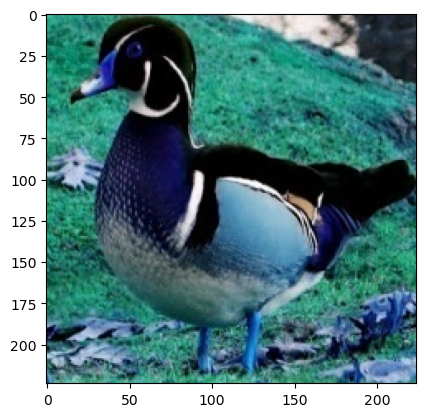

Predicted class: WILLOW PTARMIGAN


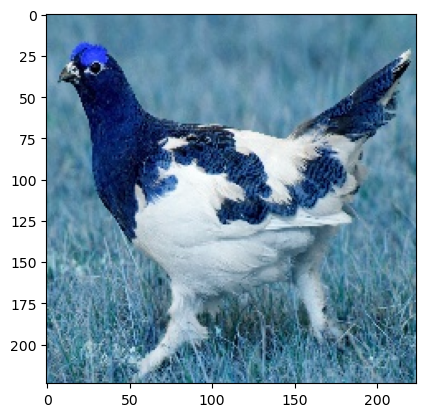

In [12]:
import numpy as np
from PIL import Image
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('./model/modelLeNet5.h5')

# Define the class labels
class_labels = ['WILLOW PTARMIGAN','VICTORIA CROWNED PIGEON','VERMILION FLYCATHER','VERDIN','VENEZUELIAN TROUPIAL','WATTLED LAPWING','WATTLED CURASSOW','WALL CREAPER','VULTURINE GUINEAFOWL','VISAYAN HORNBILL','VIOLET TURACO','WHITE CRESTED HORNBILL','WHITE CHEEKED TURACO','WHITE BROWED CRAKE','WHITE BREASTED WATERHEN','WHIMBREL','WILD TURKEY','WHITE THROATED BEE EATER','WHITE TAILED TROPIC','WHITE NECKED RAVEN','WHITE EARED HUMMINGBIRD', 'WILSONS BIRD OF PARADISE', 'WOOD DUCK', 'WOOD THRUSH', 'WOODLAND KINGFISHER', 'WRENTIT', 'YELLOW BELLIED FLOWERPECKER', 'YELLOW CACIQUE', 'YELLOW HEADED BLACKBIRD', 'ZEBRA DOVE']


import cv2

# Load input image with shape (224, 224, 3)
input_image1 = cv2.imread("C:/Users/Nithish/OneDrive/Desktop/dataset/test/WOOD DUCK/3.jpg")
input_image2 = cv2.imread("C:/Users/Nithish/OneDrive/Desktop/dataset/test/WILLOW PTARMIGAN/5.jpg")
# Resize input image to (28, 28)
resized_image1 = cv2.resize(input_image1, (28, 28))
resized_image2 = cv2.resize(input_image2, (28, 28))

# Convert input image to grayscale
gray_image1 = cv2.cvtColor(resized_image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(resized_image2, cv2.COLOR_BGR2GRAY)
# Reshape input image to (1, 28, 28, 1) to match expected input shape
image1 = gray_image1.reshape((1, 28, 28, 1))
image2 = gray_image2.reshape((1, 28, 28, 1))

# Make the prediction
prediction_1 = model.predict(image1)
predicted_class1 = np.argmax(prediction_1)
prediction_2= model.predict(image2)
predicted_class2 = np.argmax(prediction_2)

# Print the predicted class label
print('Predicted class:', class_labels[predicted_class1])
plt.figure('input_image1')
plt.imshow(input_image1,cmap='gray')
plt.show()
print('Predicted class:', class_labels[predicted_class2])
plt.figure('input_image2')
plt.imshow(input_image2,cmap='gray')
plt.show()

In [11]:
import matplotlib.pyplot as plt